# ANALYSIS OF CASUSES OF HOSPITILIZATION IN DIFFERENT REGIONS FOR A MULTI-SPECALITY HOSPITAL CHAIN.

Apollo Hospitals was established in 1983, renowned as the architect of modern healthcare in India. As the nation's first corporate hospital, Apollo Hospitals is acclaimed for pioneering the private healthcare revolution in the country.


# BUSINESS PROBLEM

As a data scientist working at Apollo 24/7, the ultimate goal is to tease out meaningful and actionable insights from Patient-level collected data.


You can help Apollo hospitals to be more efficient, to influence diagnostic and treatment processes, to map the spread of a pandemic.

In [201]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

from scipy.stats import levene
from scipy.stats import shapiro
from scipy.stats import ttest_ind
from scipy.stats import f_oneway, kruskal
from scipy.stats import chi2_contingency

# DATASET

In [2]:
data = pd.read_csv("scaler_apollo_hospitals.CSV")

In [3]:
data.head()

,Unnamed: 0,age,sex,smoker,region,viral load,severity level,hospitalization charges
0,0,19,female,yes,southwest,9.30,0,42212
1,1,18,male,no,southeast,11.26,1,4314
2,2,28,male,no,southeast,11.00,3,11124
3,3,33,male,no,northwest,7.57,0,54961
4,4,32,male,no,northwest,9.63,0,9667


In [4]:
data.shape

(1338, 8)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Unnamed: 0               1338 non-null   int64  
 1   age                      1338 non-null   int64  
 2   sex                      1338 non-null   object 
 3   smoker                   1338 non-null   object 
 4   region                   1338 non-null   object 
 5   viral load               1338 non-null   float64
 6   severity level           1338 non-null   int64  
 7   hospitalization charges  1338 non-null   int64  
dtypes: float64(1), int64(4), object(3)
memory usage: 83.8+ KB


In [7]:
data.describe()

,Unnamed: 0,age,viral load,severity level,hospitalization charges
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,668.500000,39.207025,10.221233,1.094918,33176.058296
std,386.391641,14.049960,2.032796,1.205493,30275.029296
min,0.000000,18.000000,5.320000,0.000000,2805.000000
25%,334.250000,27.000000,8.762500,0.000000,11851.000000
50%,668.500000,39.000000,10.130000,1.000000,23455.000000
75%,1002.750000,51.000000,11.567500,2.000000,41599.500000
max,1337.000000,64.000000,17.710000,5.000000,159426.000000


In [8]:
data.sample(10)

,Unnamed: 0,age,sex,smoker,region,viral load,severity level,hospitalization charges
718,718,51,female,no,northwest,12.22,2,27120
1233,1233,58,male,no,southwest,7.77,0,28364
385,385,19,male,no,southwest,11.47,0,3155
853,853,53,female,no,northeast,7.92,2,29324
913,913,44,female,no,southwest,9.17,1,19067
810,810,46,female,no,southwest,10.27,3,23537
240,240,23,female,yes,northeast,12.22,2,96279
793,793,53,male,yes,southeast,6.97,0,52990
333,333,56,female,no,northeast,9.60,0,29146
4,4,32,male,no,northwest,9.63,0,9667


In [10]:
data.drop(columns = ["Unnamed: 0"], inplace = True)

In [11]:
data.head()

,age,sex,smoker,region,viral load,severity level,hospitalization charges
0,19,female,yes,southwest,9.30,0,42212
1,18,male,no,southeast,11.26,1,4314
2,28,male,no,southeast,11.00,3,11124
3,33,male,no,northwest,7.57,0,54961
4,32,male,no,northwest,9.63,0,9667


# AGE

This is an integer indicating the age of the primary beneficiary (excluding those above 64 years, since they are generally covered by the government).

In [13]:
data["age"].describe()

count    1338.000000
mean       39.207025
std        14.049960
min        18.000000
25%        27.000000
50%        39.000000
75%        51.000000
max        64.000000
Name: age, dtype: float64

<AxesSubplot:xlabel='age'>

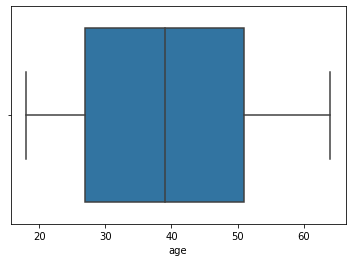

In [14]:
sns.boxplot(x = data["age"])

# SEX

This is the policy holder's gender, either male or female.

In [15]:
data["sex"].value_counts()

male      676
female    662
Name: sex, dtype: int64

<AxesSubplot:xlabel='sex', ylabel='count'>

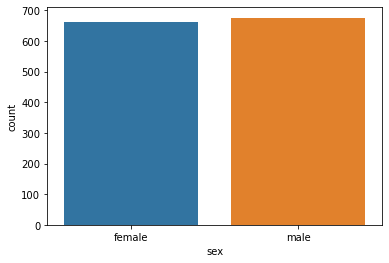

In [17]:
sns.countplot(x = data["sex"])

In [24]:
len(data[data["sex"] == "male"])/len(data)*100

50.52316890881914

In [25]:
len(data[data["sex"] == "female"])/len(data)*100

49.47683109118087

- 50.52% of the data are male
- 49.48% 0f the data are female

# smoker

In [26]:
data["smoker"].value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

<AxesSubplot:xlabel='smoker', ylabel='count'>

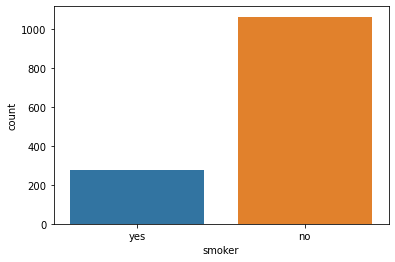

In [27]:
sns.countplot(x = data["smoker"])

In [30]:
len(data[data["smoker"] == "yes"])/len(data) * 100

20.47832585949178

In [29]:
len(data[data["smoker"] == "no"])/len(data) * 100

79.52167414050822

- 20.48% of the people are smoker
- 79.52% of the people are non smoker

# REGION

In [31]:
data["region"].value_counts()

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

<AxesSubplot:xlabel='region', ylabel='count'>

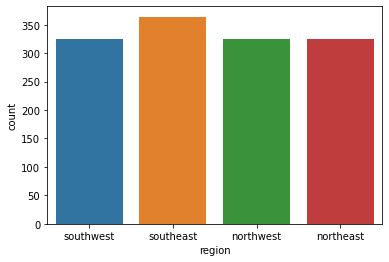

In [34]:
sns.countplot(x = data["region"])

In [36]:
len(data[data["region"] == "southwest"])/ len(data)* 100

24.28998505231689

In [37]:
len(data[data["region"] == "southeast"])/ len(data)* 100

27.204783258594915

In [38]:
len(data[data["region"] == "northwest"])/ len(data)* 100

24.28998505231689

In [39]:
len(data[data["region"] == "northeast"])/ len(data)* 100

24.2152466367713

- 24.28% of people are from southwest
- 27.2% of people are from southeast
- 24.28 %of people are from northwest
- 24.21% of people are from northeast

# VIRAL_LOAD

Viral load refers to the amount of virus in an infected person's blood

In [41]:
data["viral load"].describe()

count    1338.000000
mean       10.221233
std         2.032796
min         5.320000
25%         8.762500
50%        10.130000
75%        11.567500
max        17.710000
Name: viral load, dtype: float64

<AxesSubplot:xlabel='viral load'>

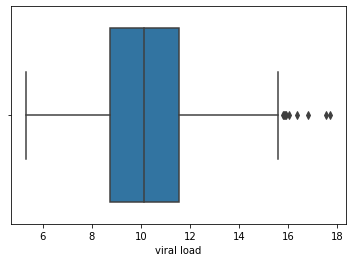

In [42]:
sns.boxplot(x = data["viral load"])

# SEVERITY LEVEL

This is an integer indicating how severe the patient is.

In [231]:
data["severity level"].value_counts()

0    574
1    324
2    240
3    157
4     25
5     18
Name: severity level, dtype: int64

<AxesSubplot:xlabel='severity level'>

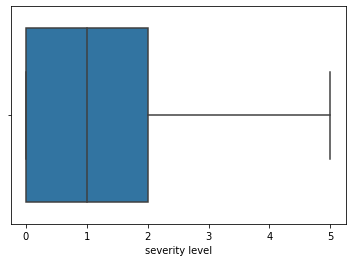

In [44]:
sns.boxplot(x = data["severity level"])

<AxesSubplot:xlabel='severity level', ylabel='count'>

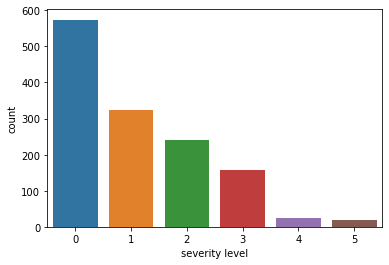

In [77]:
sns.countplot( x = data["severity level"])

# HOSPITILIZATION CHARGES

Individual medical costs billed to health insurance.

In [45]:
data["hospitalization charges"].describe()

count      1338.000000
mean      33176.058296
std       30275.029296
min        2805.000000
25%       11851.000000
50%       23455.000000
75%       41599.500000
max      159426.000000
Name: hospitalization charges, dtype: float64

<AxesSubplot:xlabel='hospitalization charges'>

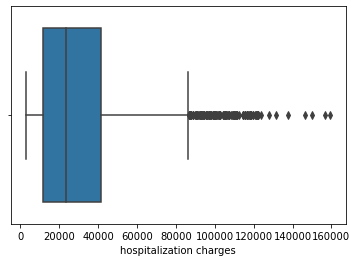

In [46]:
sns.boxplot(x = data["hospitalization charges"])

# HANDELING NULL VALUES

In [47]:
data.isnull().sum()

age                        0
sex                        0
smoker                     0
region                     0
viral load                 0
severity level             0
hospitalization charges    0
dtype: int64

- There are no null values in the data.

# HANDLING OUTLIERS

- As checked above only "hospitilization charges" column has outliers.

<AxesSubplot:xlabel='hospitalization charges'>

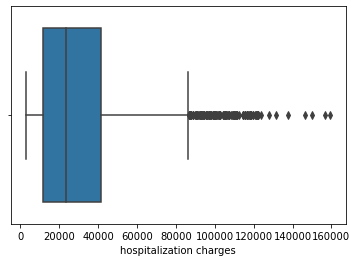

In [48]:
sns.boxplot(x = data["hospitalization charges"])

In [49]:
data["hospitalization charges"].describe()

count      1338.000000
mean      33176.058296
std       30275.029296
min        2805.000000
25%       11851.000000
50%       23455.000000
75%       41599.500000
max      159426.000000
Name: hospitalization charges, dtype: float64

In [55]:
Q1 = np.percentile(data["hospitalization charges"],25, interpolation = "midpoint")
Q3 = np.percentile(data["hospitalization charges"],75, interpolation = "midpoint")
IQR = Q3-Q1
LW = Q1 - (1.5*IQR)
RW = Q3 + (1.5*IQR)
print("Q1-", Q1, ",Q2-", Q2, ",IQR-", IQR, ",LW-", LW, ",RW-", RW )

Q1- 11856.0 ,Q2- 41555.0 ,IQR- 29699.0 ,LW- -32692.5 ,RW- 86103.5


In [62]:
(data[data["hospitalization charges"] >= 86103.5]).count()

age                        140
sex                        140
smoker                     140
region                     140
viral load                 140
severity level             140
hospitalization charges    140
dtype: int64

- There are  140 outliers.
- Replacing the outliers with 75 percentile

In [66]:
a = data["hospitalization charges"] >= 86103.5

In [69]:
data["hospitalization charges"] = np.where(data["hospitalization charges"]>=86103.5, Q3, data["hospitalization charges"])

In [71]:
data["hospitalization charges"].describe()

count     1338.000000
mean     26524.633782
std      17811.389959
min       2805.000000
25%      11851.000000
50%      23455.000000
75%      41532.750000
max      86100.000000
Name: hospitalization charges, dtype: float64

<AxesSubplot:xlabel='hospitalization charges'>

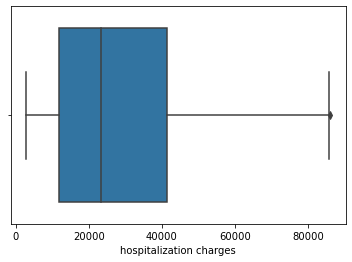

In [73]:
sns.boxplot(x = data["hospitalization charges"])

# FEATURE CREATION

# AGE BINS

In [103]:
dictonary = [(data["age"] <=17), ((data["age"] >17) & (data["age"] <31)), ((data["age"] >30) & (data["age"]<46)),((data["age"]>45) & (data["age"]<=60)), (data["age"] > 60) ]
values = ["0-17", "18-30", "31-45","46-60", "60+"]

In [104]:
data["age_bins"] = np.select(dictonary,values)

In [105]:
data.head()

,age,sex,smoker,region,viral load,severity level,hospitalization charges,age_bins
0,19,female,yes,southwest,9.30,0,42212.0,18-30
1,18,male,no,southeast,11.26,1,4314.0,18-30
2,28,male,no,southeast,11.00,3,11124.0,18-30
3,33,male,no,northwest,7.57,0,54961.0,31-45
4,32,male,no,northwest,9.63,0,9667.0,31-45


In [106]:
data["age_bins"].value_counts()

18-30    444
46-60    409
31-45    394
60+       91
Name: age_bins, dtype: int64

# EXPLORATORY DATA ANALYSIS

In [122]:
data.head()

,age,sex,smoker,region,viral load,severity level,hospitalization charges,age_bins
0,19,female,yes,southwest,9.30,0,42212.0,18-30
1,18,male,no,southeast,11.26,1,4314.0,18-30
2,28,male,no,southeast,11.00,3,11124.0,18-30
3,33,male,no,northwest,7.57,0,54961.0,31-45
4,32,male,no,northwest,9.63,0,9667.0,31-45


# AGE BINS VS VIRAL LOAD

In [119]:
data.groupby(["age_bins"])["viral load"].mean()

age_bins
18-30     9.963761
31-45    10.147183
46-60    10.440196
60+      10.813956
Name: viral load, dtype: float64

<AxesSubplot:xlabel='age_bins', ylabel='viral load'>

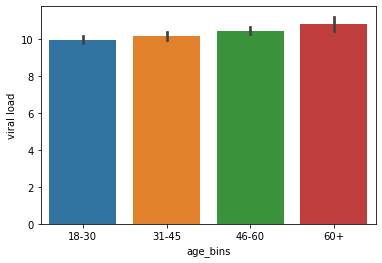

In [120]:
sns.barplot(x = data["age_bins"], y = data["viral load"])

<AxesSubplot:xlabel='age_bins', ylabel='viral load'>

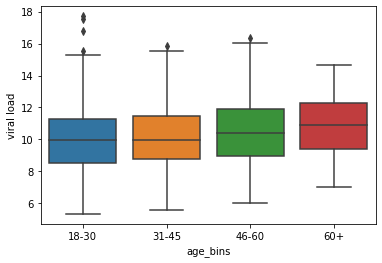

In [108]:
sns.boxplot(x = data["age_bins"], y = data["viral load"])

- There are no significance diffrence between age bins and viral load but higher ages tend to have slightly higher viral load.

# AGE BINS VS SEVERITY LEVEL

In [118]:
data.groupby(["age_bins"])["severity level"].mean()

age_bins
18-30    0.840090
31-45    1.451777
46-60    1.124694
60+      0.659341
Name: severity level, dtype: float64

<AxesSubplot:xlabel='age_bins', ylabel='severity level'>

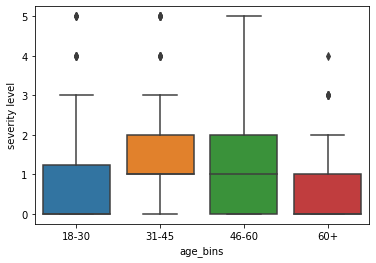

In [111]:
sns.boxplot(x = data["age_bins"] , y = data["severity level"])

<AxesSubplot:xlabel='age_bins', ylabel='severity level'>

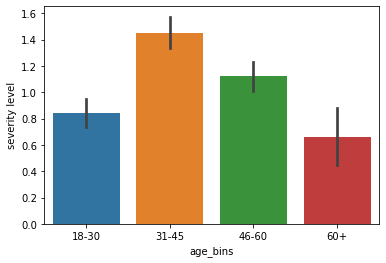

In [121]:
sns.barplot( x= data["age_bins"], y = data["severity level"])

- The severity level is much higher between age groups 31-45
- The severity level is lower in age group above 60

# AGE_BINS VS HOSPITILIZATION_CHARGES

In [125]:
data.groupby(["age_bins"])["hospitalization charges"].mean()

age_bins
18-30    18858.207207
31-45    24333.763959
46-60    33528.924205
60+      41934.978022
Name: hospitalization charges, dtype: float64

<AxesSubplot:xlabel='age_bins', ylabel='hospitalization charges'>

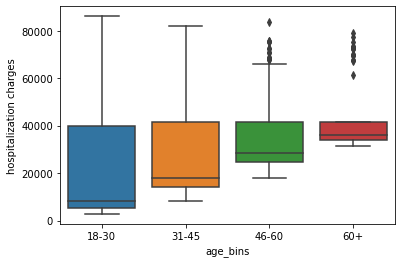

In [126]:
sns.boxplot(x = data["age_bins"], y = data["hospitalization charges"])

<AxesSubplot:xlabel='age_bins', ylabel='hospitalization charges'>

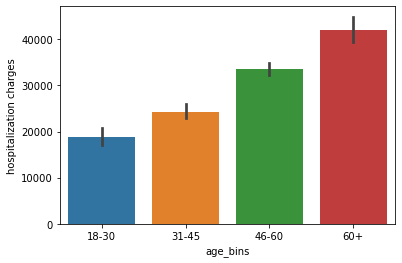

In [127]:
sns.barplot(x = data["age_bins"], y = data["hospitalization charges"])

- The hospitalization charges is very high for people aged 60+
- The hospitalization charges are slightly lesser for people between age group 46-60
- The hospitalization charges are medium for people between age group 31-45
- The hospitalization charges ane very less for people between age group 18-30

# AGE_BINS VS SMOKER

<AxesSubplot:xlabel='age_bins', ylabel='count'>

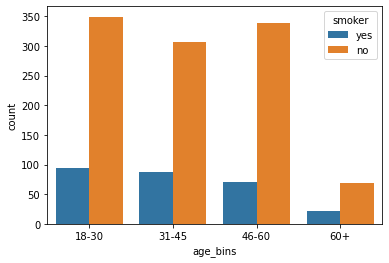

In [133]:
sns.countplot(x = data["age_bins"], hue = data["smoker"])

- The age group 18-30, 31-45 has more number of smokers
- The age group 46-60 has medium number of smokers
- The age group 60+ has less number of smokers

# SEX VS VIRAL LOAD

In [134]:
data.groupby(["sex"])["viral load"].mean()

sex
female    10.126073
male      10.314423
Name: viral load, dtype: float64

<AxesSubplot:xlabel='sex', ylabel='viral load'>

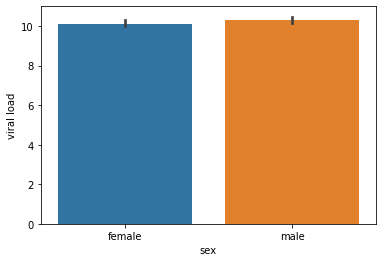

In [135]:
sns.barplot(x = data["sex"], y = data["viral load"])

- The average viral load is more or less same between male and female

# SEX VS SEVERITY LEVEL 

In [141]:
data.groupby(["sex"])["severity level"].mean()

sex
female    1.074018
male      1.115385
Name: severity level, dtype: float64

<AxesSubplot:xlabel='sex', ylabel='severity level'>

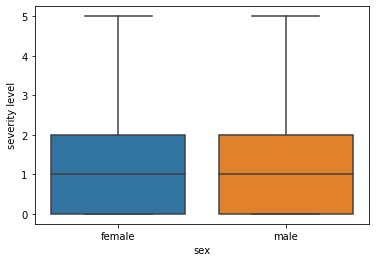

In [142]:
sns.boxplot(x = data["sex"], y = data["severity level"])

<AxesSubplot:xlabel='sex', ylabel='severity level'>

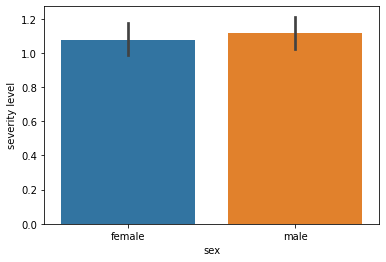

In [143]:
sns.barplot(x = data["sex"], y = data["severity level"])

- The severity level is similar for both male and female

# SEX VS HOSPITALIZATION CHARGES

In [145]:
data.groupby(["sex"])["hospitalization charges"].mean()

sex
female    26482.471299
male      26565.923077
Name: hospitalization charges, dtype: float64

<AxesSubplot:xlabel='sex', ylabel='hospitalization charges'>

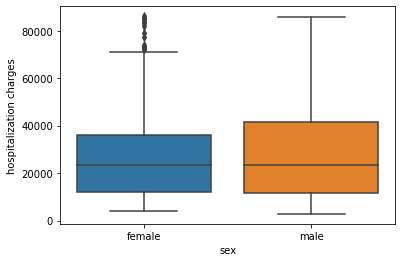

In [146]:
sns.boxplot(x = data["sex"], y = data["hospitalization charges"])

<AxesSubplot:xlabel='sex', ylabel='hospitalization charges'>

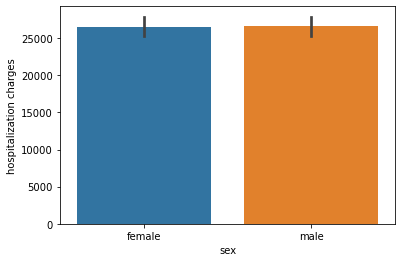

In [147]:
sns.barplot(x = data["sex"], y = data["hospitalization charges"])

- The hospitalization charges is similar between male and female

# SEX VS SMOKER

<AxesSubplot:xlabel='sex', ylabel='count'>

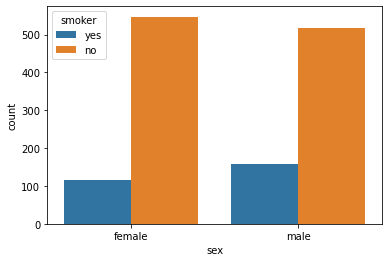

In [150]:
sns.countplot(x=data["sex"], hue=data["smoker"])

- The no of smokers are similar between male and female

# REGION VS VIRAL LOAD

In [151]:
data.groupby(["region"])["viral load"].mean()

region
northeast     9.724722
northwest     9.733508
southeast    11.118516
southwest    10.198985
Name: viral load, dtype: float64

<AxesSubplot:xlabel='region', ylabel='viral load'>

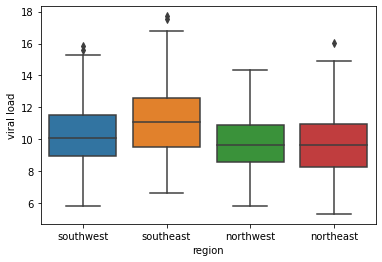

In [152]:
sns.boxplot(x = data["region"], y = data["viral load"])

<AxesSubplot:xlabel='region', ylabel='viral load'>

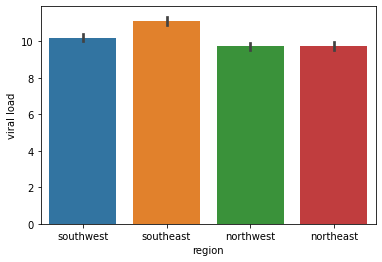

In [153]:
sns.barplot(x = data["region"], y = data["viral load"])

- The region southest has higher viral load than other regions

# REGION VS SEVERITY LEVEL

In [157]:
data.groupby(["region"])["severity level"].mean()

region
northeast    1.046296
northwest    1.147692
southeast    1.049451
southwest    1.141538
Name: severity level, dtype: float64

<AxesSubplot:xlabel='region', ylabel='severity level'>

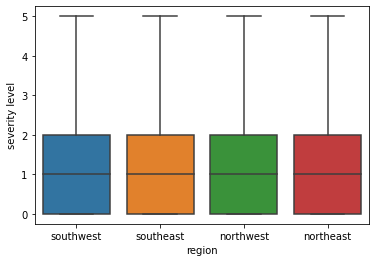

In [158]:
sns.boxplot(x= data["region"], y=data["severity level"])

<AxesSubplot:xlabel='region', ylabel='severity level'>

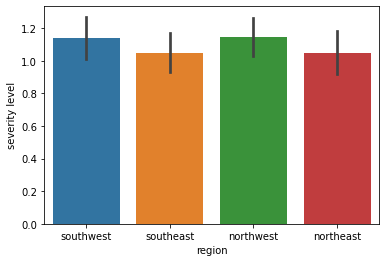

In [159]:
sns.barplot(x=data["region"], y=data["severity level"])

- The region southwest and northwest region has higher severity level than other two regions

# REGION VS HOSPITILIZATION CHARGES

In [161]:
data.groupby(["region"])["hospitalization charges"].mean()

region
northeast    28112.268519
northwest    26871.818462
southeast    26694.777473
southwest    24404.138462
Name: hospitalization charges, dtype: float64

<AxesSubplot:xlabel='region', ylabel='hospitalization charges'>

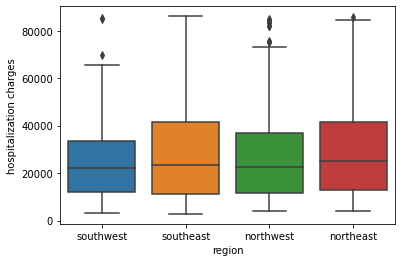

In [162]:
sns.boxplot(x= data["region"], y=data["hospitalization charges"])

<AxesSubplot:xlabel='region', ylabel='hospitalization charges'>

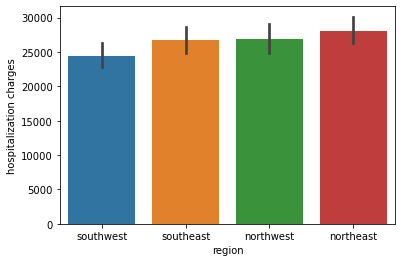

In [163]:
sns.barplot(x=data["region"], y=data["hospitalization charges"])

- The hospitalization charges is higher in northest region
- The hospitalization charges are medium in southeast and northwest region
- The hospitalization charges is lower in southwest region

# REGION VS SMOKER

<AxesSubplot:xlabel='region', ylabel='count'>

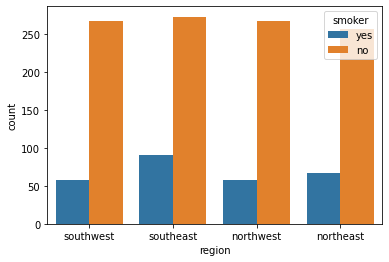

In [164]:
sns.countplot(x=data["region"], hue=data["smoker"])

- The number of smokers is higher in southwest region than other region

# FEATURE ENGINEERING

In [169]:
data1 = data

In [170]:
data1.head()

,age,sex,smoker,region,viral load,severity level,hospitalization charges,age_bins
0,19,female,yes,southwest,9.30,0,42212.0,18-30
1,18,male,no,southeast,11.26,1,4314.0,18-30
2,28,male,no,southeast,11.00,3,11124.0,18-30
3,33,male,no,northwest,7.57,0,54961.0,31-45
4,32,male,no,northwest,9.63,0,9667.0,31-45


# Categorical encoding

- sex
- smoker

In [171]:
from sklearn.preprocessing import LabelEncoder

In [175]:
label_encoder = LabelEncoder()

In [176]:
data1["sex"].value_counts()

male      676
female    662
Name: sex, dtype: int64

In [177]:
data1["sex"] = label_encoder.fit_transform(data1["sex"])

In [178]:
data1["sex"].value_counts()

1    676
0    662
Name: sex, dtype: int64

In [179]:
data1["smoker"].value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

In [180]:
data1["smoker"] = label_encoder.fit_transform(data1["smoker"])

In [181]:
data1["smoker"].value_counts()

0    1064
1     274
Name: smoker, dtype: int64

In [183]:
data1["region"].value_counts()

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

In [184]:
data1["region"] = label_encoder.fit_transform(data1["region"])

In [185]:
data1["region"].value_counts()

2    364
3    325
1    325
0    324
Name: region, dtype: int64

# STANDARDIZATION

In [182]:
from sklearn.preprocessing import StandardScaler

In [186]:
data2 = data1[["age","viral load", "hospitalization charges"]]

In [187]:
data2.head()

,age,viral load,hospitalization charges
0,19,9.30,42212.0
1,18,11.26,4314.0
2,28,11.00,11124.0
3,33,7.57,54961.0
4,32,9.63,9667.0


In [189]:
data2 = StandardScaler().fit_transform(data2)

In [191]:
data2 = pd.DataFrame(data2, columns= ["age","viral load", "hospitalization charges"])

In [192]:
data2.head()

,age,viral load,hospitalization charges
0,-1.438764,-0.453355,0.881078
1,-1.509965,0.511195,-1.247457
2,-0.797954,0.383245,-0.864974
3,-0.441948,-1.304718,1.597124
4,-0.513149,-0.290956,-0.946806


In [195]:
data2["sex"] = data1["sex"]
data2["smoker"] = data1["smoker"]
data2["severity level"] = data1["severity level"]
data2["region"] = data1["region"]
data2.head()

,age,viral load,hospitalization charges,sex,smoker,severity level,region
0,-1.438764,-0.453355,0.881078,0,1,0,3
1,-1.509965,0.511195,-1.247457,1,0,1,2
2,-0.797954,0.383245,-0.864974,1,0,3,2
3,-0.441948,-1.304718,1.597124,1,0,0,1
4,-0.513149,-0.290956,-0.946806,1,0,0,1


# HYPOTHESIS TESTING

# Relation between hospitalization charges and smoker

In [196]:
data2.groupby(["smoker"])["hospitalization charges"].mean()

smoker
0   -0.313236
1    1.216361
Name: hospitalization charges, dtype: float64

<AxesSubplot:xlabel='smoker', ylabel='hospitalization charges'>

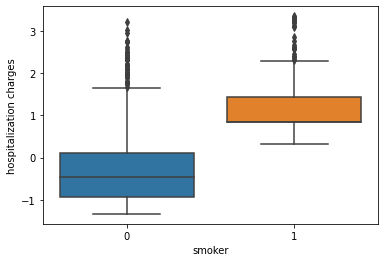

In [197]:
sns.boxplot(x=data2["smoker"], y=data2["hospitalization charges"])

<AxesSubplot:xlabel='smoker', ylabel='hospitalization charges'>

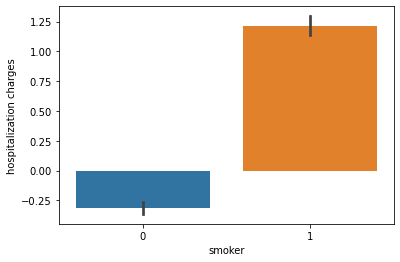

In [198]:
sns.barplot(x=data2["smoker"], y=data2["hospitalization charges"])

In [199]:
smoker_hospitalization_charges = data2[data2["smoker"] == 1]["hospitalization charges"]

In [200]:
non_smoker_hospitalization_charges = data2[data2["smoker"] == 0]["hospitalization charges"]

## RIGHT TAILED T-TEST

SET UP HYPOTHESIS

- NULL HYPOTHESIS: The hospitilization charges for smoker is equal to the hospitalization charges for non smoker.mu1 = mu2
- ALTERNATE HYPOTHESIS: The hospitalization charges for smoker is greater than the hospitalization charges for non smoker. mu1 > mu2
- SIGNIFICANCE LEVEL:95%
- ALPHA:0.05

SET TEST STATISTIC

- The column smoker is categorical value and the column hospitilization charges is numerical.
- Therefore right tailed t-test statastic is sutable.

In [202]:
ttest_ind(smoker_hospitalization_charges, non_smoker_hospitalization_charges )

Ttest_indResult(statistic=28.676605526452832, pvalue=2.4749994588348777e-141)

AT 95% SIGNIFICANCE
- p-value is lesser than alpha
- Therefore we reject null hypothesis
- The hospitilization charges for smoker is GREATER THAN hospitalization charges for non smoker.

CHECKING ASSUMPTIONS

LEVENES TEST
SET UP HYPOTHESIS

- NULL HYPOTHESIS: The hospitilization charges for smoker is equal to the hospitalization charges for non smoker.SD1 = SD2
- ALTERNATE HYPOTHESIS: The hospitalization charges for smoker is greater than the hospitalization charges for non smoker. SD1 > SD2
- SIGNIFICANCE LEVEL:95%
- ALPHA:0.05

In [203]:
levene(smoker_hospitalization_charges, non_smoker_hospitalization_charges )

LeveneResult(statistic=29.111495595899232, pvalue=8.07456319759789e-08)

AT 95% SIGNIFICANCE
- p-value is lesser than alpha
- Therefore we reject null hypothesis
- The hospitilization charges for smoker is GREATER THAN hospitalization charges for non smoker.

# Hence, we can conclude that hospitalization charges for smoker is higher than non smoker.

# Relation between viral load and sex

In [205]:
data2.groupby(["sex"])["viral load"].mean()

sex
0   -0.04683
1    0.04586
Name: viral load, dtype: float64

<AxesSubplot:xlabel='sex', ylabel='viral load'>

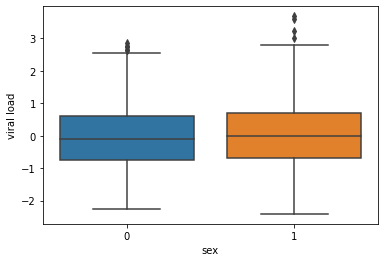

In [206]:
sns.boxplot(x = data2["sex"], y = data2["viral load"])

<AxesSubplot:xlabel='sex', ylabel='viral load'>

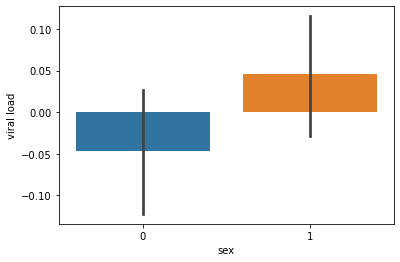

In [208]:
sns.barplot(x=data2["sex"], y=data2["viral load"])

In [209]:
male_viral_load = data2[data2["sex"] == 1]["viral load"]

In [210]:
female_viral_load = data2[data2["sex"] == 0]["viral load"]

# TWO TAILED T TEST

SET UP HYPOTHESIS

- NULL HYPOTHESIS: The viral load of male and female are same.mu1 = mu2
- ALTERNATE HYPOTHESIS: The viral load of male and female are diffrent. mu1 != mu2
- SIGNIFICANCE LEVEL:95%
- ALPHA:0.05

SET TEST STATISTIC

- The column sex is categorical value and the column viral load is numerical.
- Therefore two tailed t-test statastic is sutable.

In [211]:
ttest_ind(male_viral_load,female_viral_load)

Ttest_indResult(statistic=1.695711164450332, pvalue=0.09017358416701865)

AT 95% SIGNIFICANCE
- The P-Value is greater than alpha
- pvalue=0.09 > alpha=0.05
- Therefore we FAIL TO REJECT THE NULL HYPOTHESIS
- We conclude the means are equal
- The viral load of male and female are same.

CHECKING ASSUMPTIONS

LEVENES TEST
SET UP HYPOTHESIS

- NULL HYPOTHESIS: The viral load for male and female are same.SD1 = SD2
- ALTERNATE HYPOTHESIS: The viral load for male and female are diffrent. SD1 != SD2
- SIGNIFICANCE LEVEL:95%
- ALPHA:0.05

In [212]:
levene(male_viral_load,female_viral_load)

LeveneResult(statistic=0.0038754151966869316, pvalue=0.9503708012456551)

AT 95% SIGNIFICANCE
- p-value is greater than alpha
- Therefore we fail reject null hypothesis
- The viral load for male and female are same.

# Hence we can conclude that the viral load is same for male and female.

# Relation between smoking and region

## Is the proportion of smoking significantly different across different regions

SETUP HYPOTHESIS

- NULL HYPOTHESIS: The proportion of smoking are not significantly diffrent across diffrent regions.
- ALTERNATE HYPOTHESIS: The proportion of smoking are significantly diffrent across diffrent regions.
- SIGNIFICANCE LEVEL: 95%
- Alpha = 0.05

SET TEST STATISTIC

- The columns smoker and region are both categorical
- Therefore the right test statstic is chi square

In [214]:
a = pd.crosstab(index = data2["smoker"], columns=data2["region"])
a

region,0,1,2,3
smoker,,,,
0,257,267,273,267
1,67,58,91,58


In [216]:
chi2_contingency(a)

(7.34347776140707,
 0.06171954839170547,
 3,
 array([[257.65022422, 258.44544096, 289.45889387, 258.44544096],
        [ 66.34977578,  66.55455904,  74.54110613,  66.55455904]]))

AT 95% SIGNIFICANCE
- The P-Value is greater than alpha
- pvalue=0.06 > alpha=0.05
- Therefore we FAIL REJECT THE NULL HYPOTHESIS
- We conclude the PROPORTION OF SMOKING ARE NOT SIGNIFICANTLY DIFFRENT across regions

## CHECKING ASSUMPTIONS

- The values are categorical
- Oservation are independent
- Each cell is mutually exclusive

# Hence we conclude that proportion of smoking is not significantly diffrent across regions

# Relation between viral load women and severity level

## Is the mean viral load of women with 0 Severity level , 1 Severity level, and 2 Severity level the same

In [226]:
data3 = data2[data2["sex"] == 0]

In [227]:
data3.head()

,age,viral load,hospitalization charges,sex,smoker,severity level,region
0,-1.438764,-0.453355,0.881078,0,1,0,3
5,-0.584350,-0.807679,-0.962252,0,0,0,2
6,0.483668,0.457062,-0.332700,0,0,1,2
7,-0.157143,-0.477961,-0.467327,0,0,3,1
9,1.480485,-0.792916,2.571416,0,0,0,1


In [228]:
data3.describe()

,age,viral load,hospitalization charges,sex,smoker,severity level,region
count,662.000000,662.000000,662.000000,662.0,662.000000,662.000000,662.000000
mean,0.021075,-0.046830,-0.002368,0.0,0.173716,1.074018,1.510574
std,1.000677,0.991814,0.987433,0.0,0.379152,1.192115,1.107959
min,-1.509965,-2.274189,-1.264025,0.0,0.000000,0.000000,0.000000
25%,-0.869155,-0.743704,-0.803797,0.0,0.000000,0.000000,1.000000
50%,0.056461,-0.091649,-0.168053,0.0,0.000000,1.000000,2.000000
75%,0.893075,0.598546,0.539863,0.0,0.000000,2.000000,2.000000
max,1.765289,2.853673,3.346041,0.0,1.000000,5.000000,3.000000


In [229]:
data3["severity level"].value_counts()

0    289
1    158
2    119
3     77
4     11
5      8
Name: severity level, dtype: int64

In [236]:
women_severity_0 = data3[data3["severity level"] == 0]["viral load"]

In [237]:
women_severity_1 = data3[data3["severity level"] == 1]["viral load"]

In [238]:
women_severity_2 = data3[data3["severity level"] == 2]["viral load"]

SETUP HYPOTHESIS

- NULL HYPOTHESIS: The means are equal
- ALTERNATE HYPOTHESIS: The means are not equal
- SIGNIFICANCE LEVEL: 95%
- Alpha = 0.05

SET TEST STATISTIC
- The column viral load is numerical and column severity level has more than two catogeries
- Therefore the right test statistic is anova test

In [239]:
f_oneway(women_severity_0,women_severity_1,women_severity_2)

F_onewayResult(statistic=0.3355061434584082, pvalue=0.7151189650367746)

AT 95% SIGNIFICANCE
- The P-Value is greater than alpha
- pvalue=0.715 > alpha=0.05
- Therefore we FAIL REJECT THE NULL HYPOTHESIS
- We conclude the means are equal


# The mean viral load of women with 0 Severity level , 1 Severity level, and 2 Severity level are same

# INSIGHTS

- 50.52% of the data are male
- 49.48% 0f the data are female
- 20.48% of the people are smoker
- 79.52% of the people are non smoker
- 24.28% of people are from southwest
- 27.2% of people are from southeast
- 24.28 %of people are from northwest
- 24.21% of people are from northeast
- There are no significance diffrence between age bins and viral load but higher ages tend to have slightly higher viral load.
- The severity level is much higher between age groups 31-45
- The severity level is lower in age group above 60
- The hospitalization charges is very high for people aged 60+
- The hospitalization charges are slightly lesser for people between age group 46-60
- The hospitalization charges are medium for people between age group 31-45
- The hospitalization charges are very less for people between age group 18-30
- The age group 18-30, 31-45 has more number of smokers
- The age group 46-60 has medium number of smokers
- The age group 60+ has less number of smokers
- The average viral load is more or less same between male and female
- The severity level is similar for both male and female
- The hospitalization charges is similar between male and female
- The no of smokers are similar between male and female
- The region southest has higher viral load than other regions
- The region southwest and northwest region has higher severity level than other two regions
- The hospitalization charges is higher in northest region
- The hospitalization charges are medium in southeast and northwest region
- The hospitalization charges is lower in southwest region
- The number of smokers is higher in southwest region than other region
- The hospitilization charges for smoker is GREATER THAN hospitalization charges for non smoker.
- The proportion of smoking is not significantly diffrent across regions

# RECCOMENDATIONS

- The severity level is much higher between age group 31-45, So doctors must treat this age group with at most care.
- The southwest region higher severity level than other regions, So avalibatily high skilled doctors at this region must be increaced.
- The southwest region also has highest no of smokers than other region, So lung related doctors must be avaliable at this region.
- The southeast region has the highest viral load, So viral specelist doctors must be avaliable at this region.